In [155]:
from contextlib import contextmanager
from csv import writer

import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [156]:
engdf = pd.read_csv("engine.csv")


In [157]:
engdf.head()
engdf.ENGINE

0       Mercedes F1 M14 E Performance
1       Mercedes F1 M12 E Performance
2       Mercedes F1 M12 E Performance
3       Mercedes F1 M12 E Performance
4       Mercedes F1 M12 E Performance
                    ...              
4303                              NaN
4304    Mercedes F1 M13 E Performance
4305    Mercedes F1 M13 E Performance
4306    Mercedes F1 M14 E Performance
4307    Mercedes F1 M14 E Performance
Name: ENGINE, Length: 4308, dtype: object

In [158]:
def engine_simple(val):
    val = str(val)
    engine_simple = val.split()
    val = engine_simple[0]
    return val

engdf.ENGINE = engdf.ENGINE.apply(engine_simple)
engdf.ENGINE

def redbull_checker(val):
    if val == "Honda" or val == "TAG" or val == "Red":
        val = "RB"
    return val






In [159]:
engdf.ENGINE = engdf.ENGINE.apply(redbull_checker)

engdf.ENGINE.unique()


engine_dummies = pd.get_dummies(engdf.ENGINE)

engdf = pd.concat([engdf, engine_dummies], axis=1)

engdf.drop(columns=['CAR'])

#print(engdf2)

,Unnamed: 0,SEQ,YEAR,EVENT,DRIVER,ENGINE,GRID POS,RACE,Team Name,Ferrari,Mercedes,RB,Renault,nan
0,0,601,2023,Las Vegas Grand Prix,George Russell,Mercedes,3,8,mercedes,False,True,False,False,False
1,1,501,2021,Russian Grand Prix,Valtteri Bottas,Mercedes,16,5,mercedes,False,True,False,False,False
2,2,502,2021,Turkish Grand Prix,Valtteri Bottas,Mercedes,1,1,mercedes,False,True,False,False,False
3,3,503,2021,Turkish Grand Prix,Lewis Hamilton,Mercedes,11,5,mercedes,False,True,False,False,False
4,4,504,2021,United States Grand Prix,Lewis Hamilton,Mercedes,2,2,mercedes,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4303,4303,96,2022,São Paulo Grand Prix,Sebastian Vettel,nan,9,11,aston-martin,False,False,False,False,True
4304,4304,97,2022,Abu Dhabi Grand Prix,Lance Stroll,Mercedes,14,8,aston-martin,False,True,False,False,False
4305,4305,98,2022,Abu Dhabi Grand Prix,Sebastian Vettel,Mercedes,9,10,aston-martin,False,True,False,False,False
4306,4306,99,2023,Bahrain Grand Prix,Fernando Alonso,Mercedes,5,3,aston-martin,False,True,False,False,False


In [160]:
print(engdf["Team Name"].unique())
print(engdf["YEAR"].unique())


engdf['Team Name'] = engdf['Team Name'].replace('bwt-racing-point-f1-team', 'aston-martin')
engdf['Team Name'] = engdf['Team Name'].replace('force-india', 'aston-martin')

engdf['Team Name'] = engdf['Team Name'].replace('lotus-f1', 'alpine')
engdf['Team Name'] = engdf['Team Name'].replace(['sauber'], 'alfa-romeo')
#group data by product and display sales as line chart

print(engdf["Team Name"].unique())





['mercedes' 'red-bull-racing' 'williams' 'ferrari-2' 'mclaren'
 'force-india' 'lotus-f1' 'marussia' 'sauber' 'caterham' 'haas'
 'bwt-racing-point-f1-team' 'alfa-romeo' 'scuderia-alphatauri-honda'
 'alpine' 'aston-martin']
[2023 2021 2022 2019 2020 2016 2017 2018 2014 2015]
['mercedes' 'red-bull-racing' 'williams' 'ferrari-2' 'mclaren'
 'aston-martin' 'alpine' 'marussia' 'alfa-romeo' 'caterham' 'haas'
 'scuderia-alphatauri-honda']


In [161]:
print(engdf.columns)


Index(['Unnamed: 0', 'SEQ', 'YEAR', 'EVENT', 'DRIVER', 'CAR', 'ENGINE',
       'GRID POS', 'RACE', 'Team Name', 'Ferrari', 'Mercedes', 'RB', 'Renault',
       'nan'],
      dtype='object')


In [162]:
points = pd.read_csv("final.csv")
print(points.columns)
engdf = engdf.rename(columns={"YEAR": "Year", "Team Name": "Team"})


#points['Year'].astype('int')
points['Team'] = points['Team'].replace('bwt-racing-point-f1-team', 'aston-martin')
points['Team'] = points['Team'].replace('force-india', 'aston-martin')

points['Team'] = points['Team'].replace('lotus-f1', 'alpine')
points['Team'] = points['Team'].replace(['sauber'], 'alfa-romeo')

#print(points)
#engdf = engdf.merge(points[['W', 'PD','PTS','WC']], left_on=['Year','Team'], right_on='Team')
#print(points.columns)
#print(engdf.columns)
points = points.sort_values(by=['Year'])
print(points)
points.set_index('Year', inplace=True)
#print(engdf)




Index(['Unnamed: 0', 'Team', 'Year', 'ST', 'W', 'PD', 'PP', 'FL', 'BF', 'BG',
       'PTS', 'WC', 'CAR', 'ENGINE'],
      dtype='object')
    Unnamed: 0             Team  Year  ST   W  PD  PP  FL  BF  BG    PTS   WC  \
14          14        ferrari-2  2014  19   0   2   0   1   2   4  216.0  4th   
24          24     aston-martin  2014  19   0   1   0   1   3   4  155.0  6th   
41          41          mclaren  2014  19   0   2   0   0   2   3  181.0  5th   
61          61  red-bull-racing  2014  19   3  12   0   3   1   2  405.0  2nd   
51          51         mercedes  2014  19  16  31  18  12   1   1  701.0  1st   
..         ...              ...   ...  ..  ..  ..  ..  ..  ..  ..    ...  ...   
50          50          mclaren  2023  20   0   9   0   2   2   2  282.0  4th   
60          60         mercedes  2023  20   0   7   1   5   2   1  382.0  2nd   
23          23        ferrari-2  2023  20   1   7   6   0   1   1  362.0  3rd   
7            7           alpine  2023  20   0   2   

      Unnamed: 0          Team  ST  W  PD  PP  FL  BF  BG    PTS   WC  \
Year                                                                    
2014          24  aston-martin  19  0   1   0   1   3   4  155.0  6th   
2015          25  aston-martin  19  0   1   0   0   3   4  136.0  5th   
2016          26  aston-martin  21  0   2   0   1   3   2  173.0  4th   
2017          27  aston-martin  20  0   0   0   1   4   3  187.0  4th   
2018          28  aston-martin  12  0   1   0   0   3   6   52.0  7th   
2019          11  aston-martin  21  0   0   0   0   4   5   73.0  7th   
2020          12  aston-martin  17  1   4   1   0   1   1  195.0  4th   
2021           8  aston-martin  22  0   1   0   0   2   5   77.0  7th   
2022           9  aston-martin  22  0   0   0   0   6   5   55.0  7th   
2023          10  aston-martin  20  0   8   0   1   2   2  261.0  5th   

                     CAR                         ENGINE  
Year                                                     
2014   

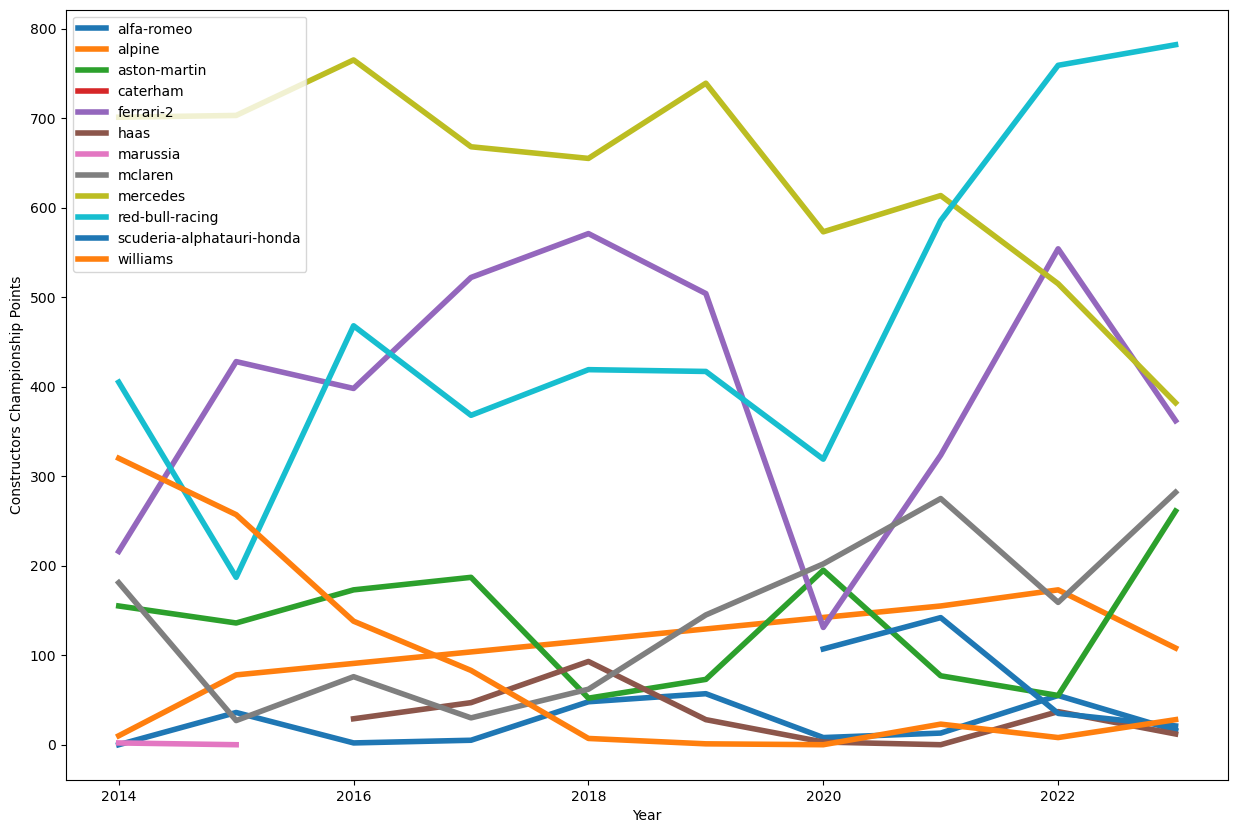

In [163]:
points.groupby('Team')['PTS'].plot(figsize=(15,10),legend=True, ylabel='Constructors Championship Points', linewidth=4.0
                                   )

#group data by product and display sales as line chart
print(points[points['Team']=='aston-martin'])

0        4
1       10
2       25
3       10
4       18
        ..
4303     0
4304     4
4305     1
4306    15
4307     8
Name: PTS, Length: 4308, dtype: int64
Year  Team                     
2014  alfa-romeo                     0
      alpine                        18
      aston-martin                 141
      caterham                       0
      ferrari-2                    213
                                  ... 
2023  mclaren                      246
      mercedes                     352
      red-bull-racing              742
      scuderia-alphatauri-honda     17
      williams                      26
Name: PTS, Length: 96, dtype: int64
Year  Ferrari
2014  False      1712
      True        217
2015  False      1491
      True        428
2016  False      1622
      True        519
2017  False      1394
      True        616
2018  False      1339
      True        763
2019  False      1520
      True        583
2020  False      1606
      True        142
2021  False      2124


Year
2014    Axes(0.125,0.11;0.775x0.77)
2015    Axes(0.125,0.11;0.775x0.77)
2016    Axes(0.125,0.11;0.775x0.77)
2017    Axes(0.125,0.11;0.775x0.77)
2018    Axes(0.125,0.11;0.775x0.77)
2019    Axes(0.125,0.11;0.775x0.77)
2020    Axes(0.125,0.11;0.775x0.77)
2021    Axes(0.125,0.11;0.775x0.77)
2022    Axes(0.125,0.11;0.775x0.77)
2023    Axes(0.125,0.11;0.775x0.77)
Name: Pos Gain, dtype: object

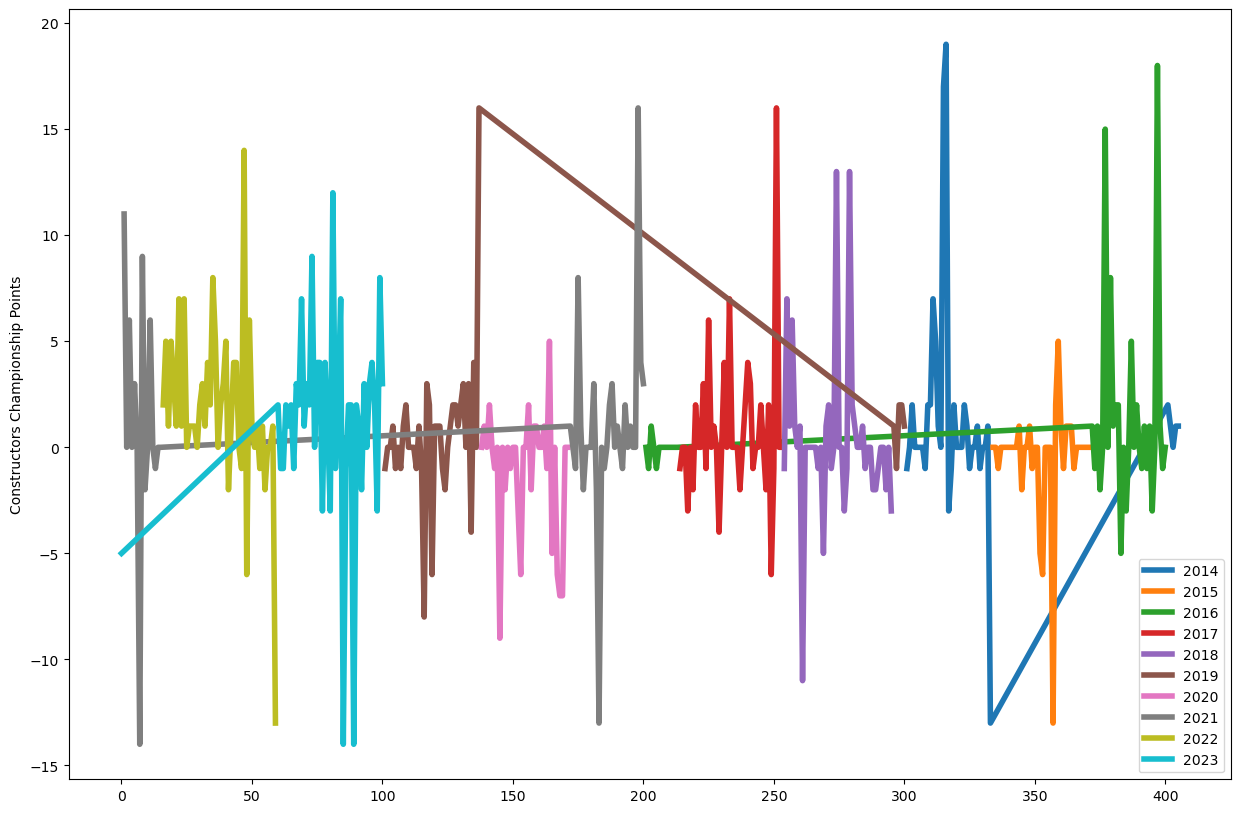

In [164]:
def champ_points(x):
    try:
        x = int(x)
    except:
        x = 0

    p = [0,25,18,15,12,10,8,6,4,2,1,0]
    if x<11:
        x = p[x]
    else:
        x = p[11]
    return x

engdf['PTS']=engdf['RACE'].apply(champ_points)
print(engdf['PTS'])

Total = engdf.groupby(['Year','Team']).sum()
print(Total['PTS'])

Ferrari = engdf.groupby(['Year','Ferrari']).sum()

Mercedes = engdf.groupby(['Year','Mercedes']).sum()
print(Ferrari['PTS'])

Mercedes = engdf[engdf['Mercedes']==1]
print(Mercedes)
##print(engdf['GRID POS'].unique())
##print(engdf['RACE'].unique())
engdf['RACE'] = engdf['RACE'].replace(['DNF', 'DSQ','NCL'], '0')

##print(engdf['RACE'].unique())
engdf['GRID POS'] = engdf['GRID POS'].astype(int)
engdf['RACE']= engdf['RACE'].astype(int)
engdf['Pos Gain'] = engdf['GRID POS'] - engdf['RACE']
yearteam = engdf.groupby(['Team', 'Year'])
merc = engdf[engdf.Team == 'mercedes']
merc.sort_values(by=['Year'])

merc.groupby('Year')['Pos Gain'].plot(figsize=(15,10),legend=True, ylabel='Constructors Championship Points', linewidth=4.0
                                   )

In [165]:
print(engdf.groupby(['Year','Team'])['Pos Gain'].mean())



Year  Team                     
2014  alfa-romeo                   5.368421
      alpine                       7.728814
      aston-martin                 4.297297
      caterham                     9.357143
      ferrari-2                    1.184211
                                     ...   
2023  mclaren                      1.214286
      mercedes                     1.166667
      red-bull-racing              3.595238
      scuderia-alphatauri-honda    2.000000
      williams                     3.714286
Name: Pos Gain, Length: 96, dtype: float64


In [166]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(yearteam['Pos Gain'].median())

Team                       Year
alfa-romeo                 2014    2.0
                           2015    3.0
                           2016    4.5
                           2017    4.0
                           2018    4.0
                           2019    1.0
                           2020    4.0
                           2021    2.0
                           2022    3.0
                           2023    4.0
alpine                     2014    6.0
                           2015    6.0
                           2021    2.0
                           2022    2.5
                           2023    1.0
aston-martin               2014    4.0
                           2015    2.0
                           2016    1.0
                           2017    1.5
                           2018    2.0
                           2019    4.0
                           2020    1.0
                           2021    2.0
                           2022    4.5
                           2023 

In [167]:
from sklearn import linear_model

# construct the model instance
merc = engdf[engdf.Team == 'mercedes']
ferrari = engdf[engdf.Team == 'ferrari-2']
redbull = engdf[engdf.Team == 'red-bull']

model = linear_model.LinearRegression()

# fit the model
def lr_team(df, model):
    model.fit(df[['GRID POS', 'Mercedes', 'Ferrari', 'RB', 'Renault']], df['RACE'])

# print the coefficients
    beta_0 = model.intercept_
    beta_1 = model.coef_[0]
    beta_2 = model.coef_[1]
    beta_3 = model.coef_[2]
    beta_4 = model.coef_[3]
    beta_5 = model.coef_[4]
    print(f"Race Position = {beta_0:.4f} + {beta_1:.4f} Grid Position + {beta_2:.4f} Mercedes Engine + {beta_3:.4f} Ferrari Engine+ {beta_4:.4f} Red Bull Engine + {beta_5:.4f} Renault Engine")

lr_team(engdf, model)

Race Position = 2.9233 + 0.4759 Grid Position + -0.1778 Mercedes Engine + 0.2937 Ferrari Engine+ -0.9829 Red Bull Engine + -0.8495 Renault Engine


In [179]:

# fit the model
def lr_team2(df, model):
    model.fit(df[['Mercedes', 'Ferrari', 'RB', 'Renault']], df['RACE'])

# print the coefficients
    beta_0 = model.intercept_
    beta_2 = model.coef_[0]
    beta_3 = model.coef_[1]
    beta_4 = model.coef_[2]
    beta_5 = model.coef_[3]
    print(f"Race Position = {beta_0:.4f} + {beta_2:.4f} Mercedes Engine + {beta_3:.4f} Ferrari Engine+ {beta_4:.4f} Red Bull Engine + {beta_5:.4f} Renault Engine")

lr_team2(engdf, model)

Race Position = 10.3239 + -2.9870 Mercedes Engine + -1.5925 Ferrari Engine+ -3.7802 Red Bull Engine + -2.5520 Renault Engine


In [180]:
engdf2022 = engdf[engdf.Year == 2022]
engdf2015 = engdf[engdf.Year == 2015]
engdf2016 = engdf[engdf.Year == 2016]

lr_team2(engdf2022, model)
lr_team2(engdf2015, model)
lr_team2(engdf2016, model)


Race Position = 7.7917 + 1.3131 Mercedes Engine + -0.0317 Ferrari Engine+ -1.4905 Red Bull Engine + -0.6964 Renault Engine
Race Position = 10.4324 + -5.1324 Mercedes Engine + -1.7886 Ferrari Engine+ -2.3491 Red Bull Engine + -3.3658 Renault Engine
Race Position = 11.8333 + -5.8016 Mercedes Engine + -3.7352 Ferrari Engine+ -5.4237 Red Bull Engine + 0.0000 Renault Engine


In [169]:
print(engdf['Pos Gain'])

0       -5
1       11
2        0
3        6
4        0
        ..
4303    -2
4304     6
4305    -1
4306     2
4307     2
Name: Pos Gain, Length: 4308, dtype: int32


      Unnamed: 0  SEQ  Year                     EVENT            DRIVER  \
0              0  601  2023      Las Vegas Grand Prix    George Russell   
1              1  501  2021        Russian Grand Prix   Valtteri Bottas   
2              2  502  2021        Turkish Grand Prix   Valtteri Bottas   
3              3  503  2021        Turkish Grand Prix    Lewis Hamilton   
4              4  504  2021  United States Grand Prix    Lewis Hamilton   
...          ...  ...   ...                       ...               ...   
4303        4303   96  2022      São Paulo Grand Prix  Sebastian Vettel   
4304        4304   97  2022      Abu Dhabi Grand Prix      Lance Stroll   
4305        4305   98  2022      Abu Dhabi Grand Prix  Sebastian Vettel   
4306        4306   99  2023        Bahrain Grand Prix   Fernando Alonso   
4307        4307  100  2023        Bahrain Grand Prix      Lance Stroll   

                                CAR    ENGINE  GRID POS  RACE          Team  \
0     Mercedes F1 W1

Year  Team                     
2014  alfa-romeo                   Axes(0.125,0.11;0.775x0.77)
      alpine                       Axes(0.125,0.11;0.775x0.77)
      aston-martin                 Axes(0.125,0.11;0.775x0.77)
      caterham                     Axes(0.125,0.11;0.775x0.77)
      ferrari-2                    Axes(0.125,0.11;0.775x0.77)
                                              ...             
2023  mclaren                      Axes(0.125,0.11;0.775x0.77)
      mercedes                     Axes(0.125,0.11;0.775x0.77)
      red-bull-racing              Axes(0.125,0.11;0.775x0.77)
      scuderia-alphatauri-honda    Axes(0.125,0.11;0.775x0.77)
      williams                     Axes(0.125,0.11;0.775x0.77)
Name: Pos Gain, Length: 96, dtype: object

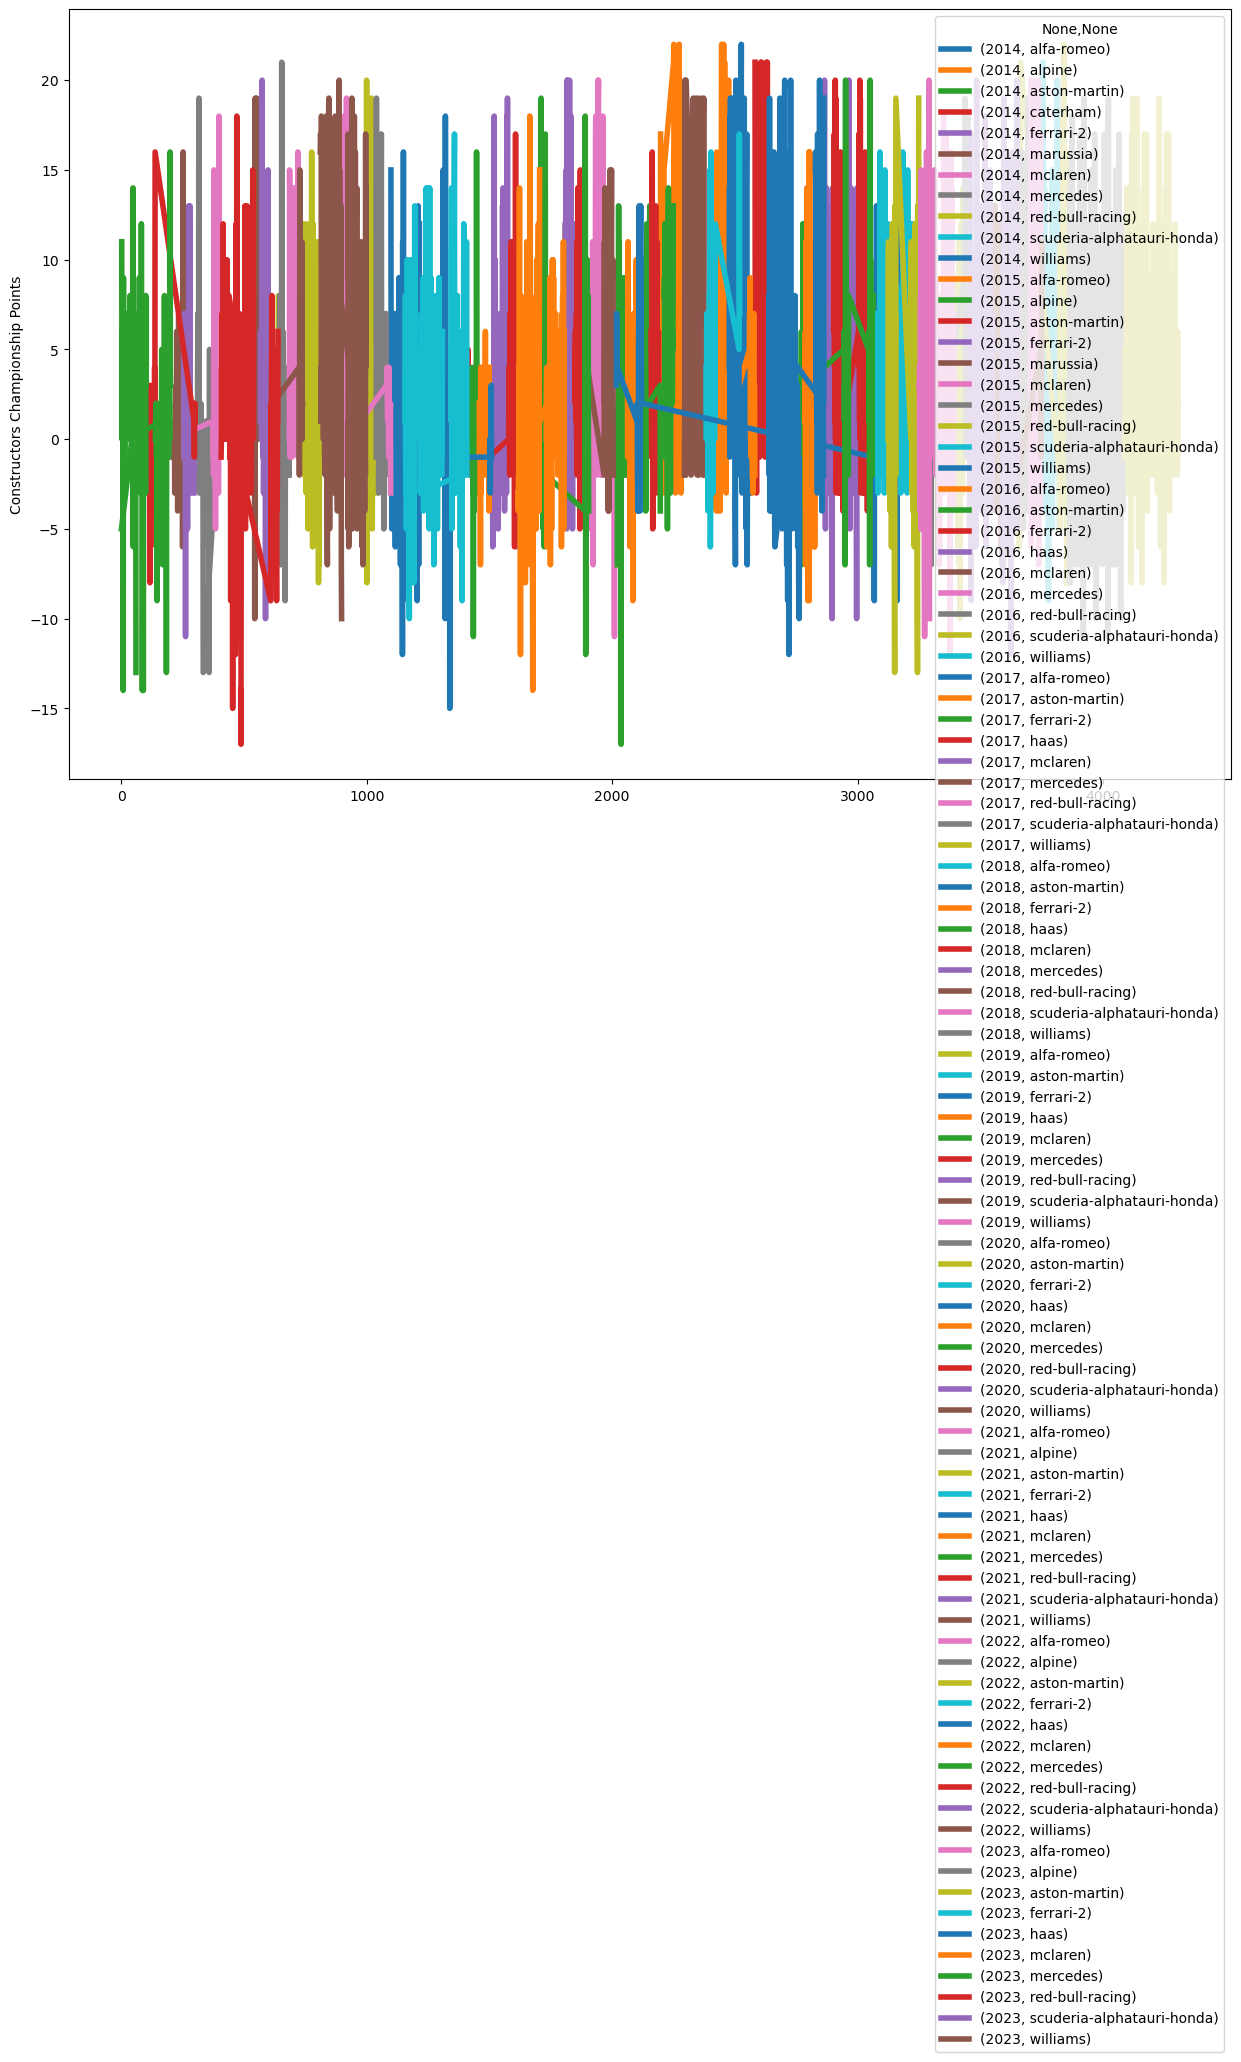

In [170]:
print(engdf)
yearteam = engdf.groupby(['Year','Team'])

yearteam['Pos Gain'].plot(figsize=(15,10),legend=True, ylabel='Constructors Championship Points', linewidth=4.0
                                   )

In [171]:
print(Mercedes['PTS'])
Renault = engdf.groupby(['Year','Renault']).sum()

RB = engdf.groupby(['Year','RB']).sum()
print(RB)

0        4
1       10
2       25
3       10
4       18
        ..
4301     0
4304     4
4305     1
4306    15
4307     8
Name: PTS, Length: 1591, dtype: int64
            Unnamed: 0     SEQ  \
Year RB                          
2014 False      942964  254813   
2015 False      627482  199166   
     True        70146   55602   
2016 False      709665  205807   
     True       109858   83932   
2017 False      674462  208950   
     True        97585   80313   
2018 False      641596  275710   
     True       182340   41160   
2019 False      705372  257040   
     True       175668   44688   
2020 False      563141  216468   
     True       143220   38760   
2021 False     1164181  288475   
     True       174525   52978   
2022 False     1164170  312599   
     True       164330   54079   
2023 False      803029  301102   
     True       163544   57682   

                                                        EVENT  \
Year RB                                                      

In [172]:
print(Renault.PTS['PTS'==True])

KeyError: False

            Unnamed: 0     SEQ  \
Year RB                          
2014 False      942964  254813   
2015 False      627482  199166   
     True        70146   55602   
2016 False      709665  205807   
     True       109858   83932   
2017 False      674462  208950   
     True        97585   80313   
2018 False      641596  275710   
     True       182340   41160   
2019 False      705372  257040   
     True       175668   44688   
2020 False      563141  216468   
     True       143220   38760   
2021 False     1164181  288475   
     True       174525   52978   
2022 False     1164170  312599   
     True       164330   54079   
2023 False      803029  301102   
     True       163544   57682   

                                                        EVENT  \
Year RB                                                         
2014 False  Bahrain Grand PrixChinese Grand PrixChinese Gr...   
2015 False  Australian Grand PrixAustralian Grand PrixMala...   
     True   Australian Gr

KeyError: 'Year'

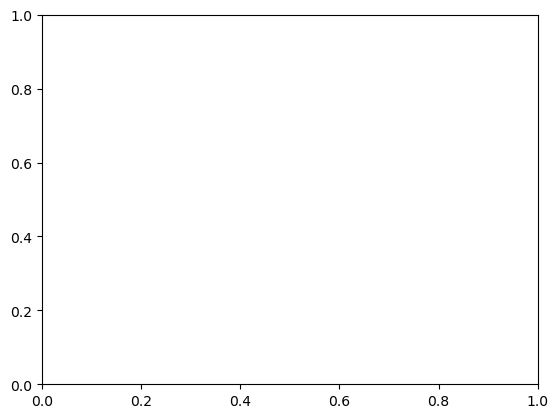

In [ ]:
print(RB)
import matplotlib.pyplot as plt 
fig, ax = plt.subplots()
RB.plot.scatter(x='Year' , y="PTS", alpha=0.35, s=1.5, ax=ax)

In [ ]:
p = [0,25,18,15,12,10,8,6,4,2,1,0]

sum(p)

101

In [ ]:
print(engdf)
engdf['GRID POS'].replace('DNF', 0)
engdf['RACE'].replace('DNF', 0)

engdf['GRID POS'].astype('int')
engdf['RACE'].astype('int')

engdf['Pos Gain'] = engdf['GRID POS'] - engdf['RACE']


      Unnamed: 0  SEQ  Year                     EVENT            DRIVER  \
0              0  601  2023      Las Vegas Grand Prix    George Russell   
1              1  501  2021        Russian Grand Prix   Valtteri Bottas   
2              2  502  2021        Turkish Grand Prix   Valtteri Bottas   
3              3  503  2021        Turkish Grand Prix    Lewis Hamilton   
4              4  504  2021  United States Grand Prix    Lewis Hamilton   
...          ...  ...   ...                       ...               ...   
4303        4303   96  2022      São Paulo Grand Prix  Sebastian Vettel   
4304        4304   97  2022      Abu Dhabi Grand Prix      Lance Stroll   
4305        4305   98  2022      Abu Dhabi Grand Prix  Sebastian Vettel   
4306        4306   99  2023        Bahrain Grand Prix   Fernando Alonso   
4307        4307  100  2023        Bahrain Grand Prix      Lance Stroll   

                                CAR    ENGINE  GRID POS RACE          Team  \
0     Mercedes F1 W14

ValueError: invalid literal for int() with base 10: 'DNF'

In [ ]:


def dnf(x):
    if x == 'DNF' or x=='DNS':
        x = 0
    return x 

engdf = engdf[type(engdf['GRID POS'])=='int']



KeyError: False

mercedes_teams.sortbvy